# FLU SHOT LEARNING:Predict H1N1 and Seasonal Flu Vaccines
HOSTED BY DRIVENDATA. [Link](https://www.drivendata.org/competitions/66/flu-shot-learning/)


In this notebook we are predicting whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

In [35]:
import pandas as pd # data analysis
import numpy as np # numerical computing
import matplotlib.pyplot as plt # visuaization

# Exploratory data analysis

In [36]:
# DATA FOR TRAINING THE MODEL
X_train = pd.read_csv('F:\\bizz\\DATA SETS\\Flu Shot Learning\\training_set_features.csv', index_col = 'respondent_id')
X_train.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [37]:
# DATA FOR TESTING 
X_test= pd.read_csv('F:\\bizz\\DATA SETS\\Flu Shot Learning\\test_set_features.csv', index_col = 'respondent_id')
X_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [38]:
# Training labels
y_train = pd.read_csv('F:\\bizz\\DATA SETS\\Flu Shot Learning\\training_set_labels.csv', index_col = 'respondent_id')
y_train.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [39]:
#corelation between features 
abs(X_train.corr())*10

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
h1n1_concern,10.000000,0.625224,0.903009,2.337130,1.560317,2.935651,2.550310,2.464241,2.480159,1.502062,...,0.335619,0.036546,2.396043,3.770328,3.600697,2.351359,3.339895,2.257314,0.156585,0.505245
h1n1_knowledge,0.625224,10.000000,0.108358,0.888393,0.300496,0.897846,0.488976,0.682187,0.861621,0.938291,...,1.702522,1.194085,1.210085,0.730860,0.195008,0.861032,0.768246,0.624829,0.248738,0.505833
behavioral_antiviral_meds,0.903009,0.108358,10.000000,0.492470,1.462605,0.641192,1.062874,1.276788,0.708683,0.512348,...,0.094651,0.639882,0.302105,1.051632,0.790906,0.150026,0.853154,0.843046,0.449000,0.848217
behavioral_avoidance,2.337130,0.888393,0.492470,10.000000,0.649461,3.381295,2.276750,2.203478,3.353354,0.681451,...,0.011797,0.326622,1.122997,1.178509,1.314054,1.195538,1.295041,0.829418,0.191218,0.403284
behavioral_face_mask,1.560317,0.300496,1.462605,0.649461,10.000000,0.833635,1.809069,1.633818,1.043353,0.842816,...,0.699919,0.402568,0.376515,1.311648,1.071292,0.415556,1.101606,0.900095,0.139909,0.058255
behavioral_wash_hands,2.935651,0.897846,0.641192,3.381295,0.833635,10.000000,1.953639,1.926190,3.650641,0.887292,...,0.537612,0.319194,1.369872,1.687112,1.500239,1.385167,1.724644,0.880293,0.096693,0.477636
behavioral_large_gatherings,2.550310,0.488976,1.062874,2.276750,1.809069,1.953639,10.000000,5.840846,2.536835,0.822423,...,0.323193,0.590001,0.522986,1.264625,1.859239,0.784907,1.328653,1.354463,0.319381,0.094487
behavioral_outside_home,2.464241,0.682187,1.276788,2.203478,1.633818,1.926190,5.840846,10.000000,2.677191,0.703456,...,0.346187,0.613812,0.507480,1.255491,1.748343,0.674695,1.202371,1.381326,0.275272,0.095578
behavioral_touch_face,2.480159,0.861621,0.708683,3.353354,1.043353,3.650641,2.536835,2.677191,10.000000,0.882211,...,0.676479,0.110245,1.041259,1.460800,1.317723,1.057976,1.437350,0.900972,0.005530,0.236063
doctor_recc_h1n1,1.502062,0.938291,0.512348,0.681451,0.842816,0.887292,0.822423,0.703456,0.882211,10.000000,...,1.016389,0.671566,1.523046,2.628259,1.131112,1.075120,2.023199,0.571278,0.041121,0.290400


In [40]:
#asserting that training columns are equal
np.testing.assert_array_equal(X_train.index.values,  y_train.index.values)

In [41]:
n_obs = y_train.shape[0]
print('Number of observations:{}'.format(n_obs))

Number of observations:26707


In [42]:
(y_train['h1n1_vaccine'].value_counts())

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [43]:
# proportion of h1n1 vaccine 
# 0 proportion of people who did not take the vaccine
# 1 proportion of people who took the vaccinedid
print(y_train['h1n1_vaccine'].value_counts().div(n_obs))

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64


In [44]:
# proportion of seasonal vaccine 
# 0 proportion of people who did not take the vaccine
# 1 proportion of people who took the vaccinedid
print(y_train['seasonal_vaccine'].value_counts().div(n_obs))

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64


# Visualization

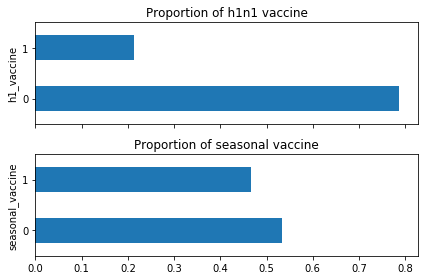

In [45]:
# proportion of h1n1 vaccine
fig, ax = plt.subplots(2, 1, sharex=True)
n_obs = y_train.shape[0]
(y_train['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title = 'Proportion of h1n1 vaccine', ax=ax[0])
)
ax[0].set_ylabel('h1_vaccine')

# proportion of seasonal vaccine 
(y_train['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title = 'Proportion of seasonal vaccine', ax=ax[1])
)
ax[1].set_ylabel('seasonal_vaccine') 
fig.tight_layout()

In [46]:
#Are the two target variables dependent ?
pd.crosstab(
    y_train['h1n1_vaccine'],
    y_train['seasonal_vaccine'],
    margins = True,
    normalize = True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [47]:
joined_df = X_train.join(y_train)
print(joined_df.shape)


(26707, 37)


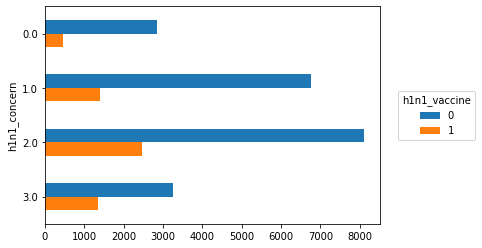

In [48]:
# vaccination rate for each level of h1n1_concern
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine'))


ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc = 'center right',
    bbox_to_anchor = (1.3, 0.5),
    title = 'h1n1_vaccine'

)

In [49]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [50]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


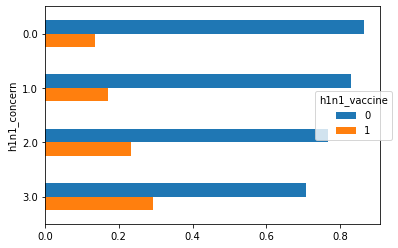

In [51]:
# Plotting proportion of h1n1_concern
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc = 'center right',
    bbox_to_anchor = (1.05, 0.5),
    title = 'h1n1_vaccine'


)

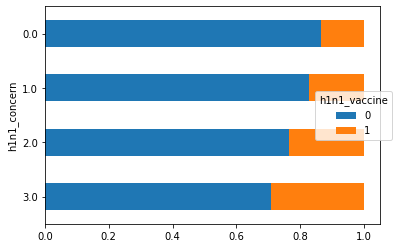

In [52]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc = 'center right',
    bbox_to_anchor = (1.05, 0.5),
    title = 'h1n1_vaccine'


)

Now lets factor this plot into a function that we can plot more variables

In [53]:
def vaccination_rate_plot(col, target, data, ax=None):
    '''stacked bar chart of vaccination rate for target against col
    
    args:
         col-column name of feature variable
         target-column name of target variable
         data- pandas dataframe that contain col(columns) and target
    
         ax- object to attach plot to
    
    '''
    counts = (joined_df[[col, target]]
              .groupby([col, target])
              .size()
              .unstack(target))
    
    grouped_counts = counts.sum(axis='columns')
    props = counts.div(grouped_counts, axis='index')
    
    props.plot(kind='barh', stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

Then loop through several columns and plot against seasonal_vaccine and h1n1_vaccine 

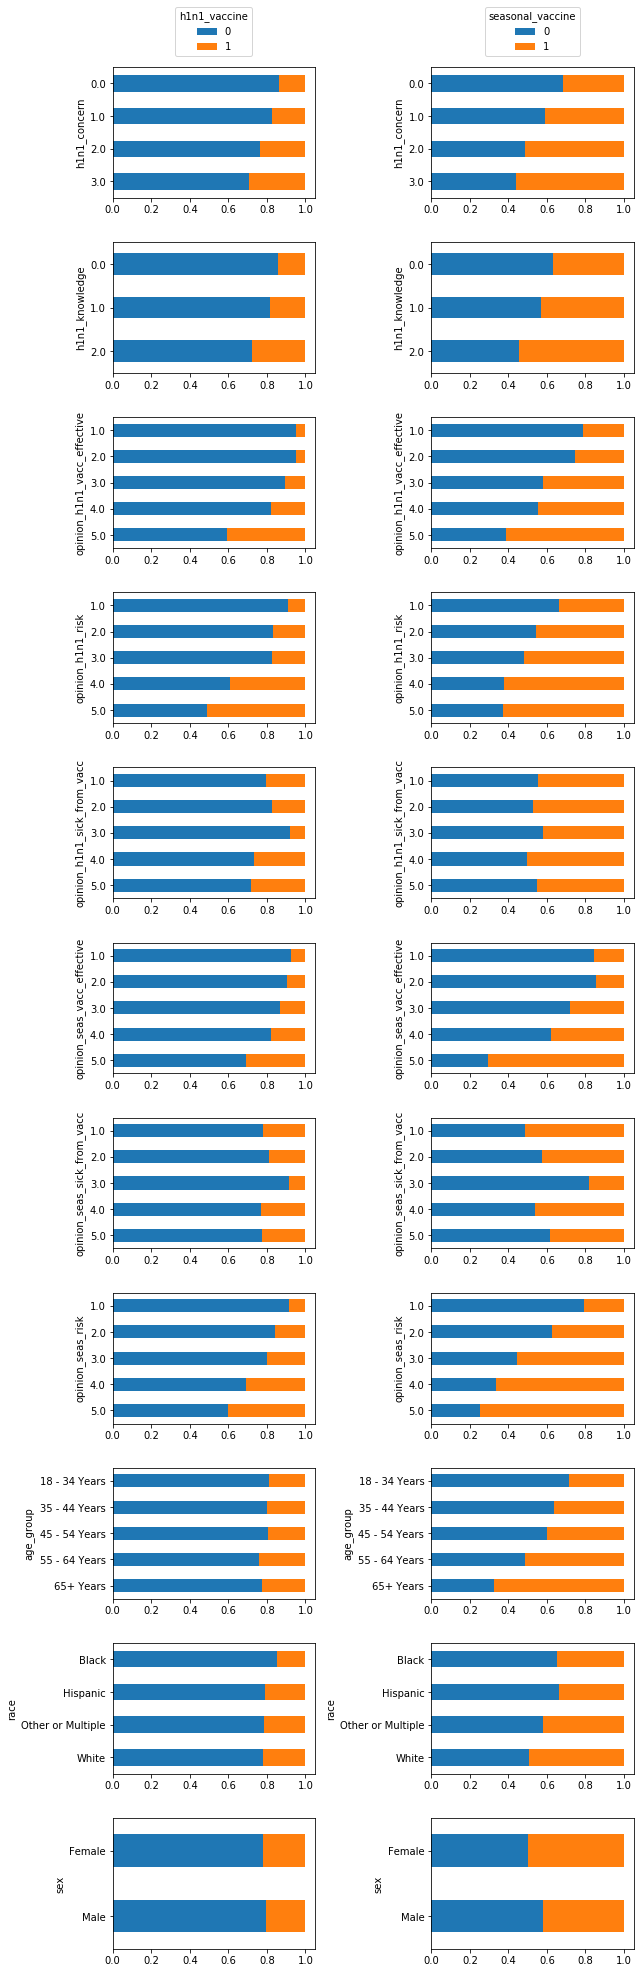

In [54]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_sick_from_vacc',
    'opinion_seas_risk',
    'age_group',
    'race',
    'sex',
    
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize = (9, len(cols_to_plot)*2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
fig.tight_layout()

We can explore the various features and get some insights based on the plots

# MODEL CREATION

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 67

In [56]:
num_cols = X_train.select_dtypes(include = 'number').columns.to_list()
num_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [57]:
# Preprocessing
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ct = ColumnTransformer(remainder = 'drop',
                      transformers = [
                          ('num_pipe', num_pipe, num_cols)
                      ])

In [58]:
# Chaining
estimators = MultiOutputClassifier(
    estimator = LogisticRegression(penalty='l2', C=1)
    
)

In [59]:
# Build the model
model_1 = Pipeline([
    ('ct', ct),
    ('classifier', estimators)
])

In [60]:
# Splitting the data to train set and test set
X_train_, X_test_, y_train_, y_test_ = train_test_split(
    X_train,
    y_train,
    test_size=0.33,
    shuffle=True,
    stratify=y_train,#stratify enforces same proportionality in an inbalance class 
    random_state=RANDOM_SEED

)

In [61]:
%%time

# Train the model
model_1.fit(X_train_,  y_train_)

# Predict on evaluation set
preds = model_1.predict_proba(X_test_)#not X_test
preds


Wall time: 717 ms


[array([[0.93475789, 0.06524211],
        [0.24167582, 0.75832418],
        [0.87068062, 0.12931938],
        ...,
        [0.45857524, 0.54142476],
        [0.75976917, 0.24023083],
        [0.81105099, 0.18894901]]),
 array([[0.66403729, 0.33596271],
        [0.05090096, 0.94909904],
        [0.72742121, 0.27257879],
        ...,
        [0.8557033 , 0.1442967 ],
        [0.54927872, 0.45072128],
        [0.23566856, 0.76433144]])]

In [62]:
print('test_probas[0]', preds[0].shape)
print('test_probas[1]', preds[1].shape)

test_probas[0] (8814, 2)
test_probas[1] (8814, 2)


In [63]:
# Converting the predictions to a data frame

y_preds =pd.DataFrame(
    
    {
       'h1n1_vaccine':preds[0][:, 1],
        'seasonal_vaccine':preds[1][:, 1],
    },
    
    index = y_test_.index

)

print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
19263,0.065242,0.335963
13455,0.758324,0.949099
11103,0.129319,0.272579
26227,0.043213,0.320680
19411,0.038546,0.103736


In [64]:
# Evaluation of the model
def plot_roc(y_true, y_score, label_name, ax):
    '''
    Function to plot ROC CURVE used to evaluate model performance
    
    args:
            y_true- true label
            y_score- predictions
            label_name- 
            ax- object to attach plot to
       
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_xlabel('TPR')
    ax.set_ylabel('FPR')
    ax.set_title(
        f'{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}'
    
    )
    

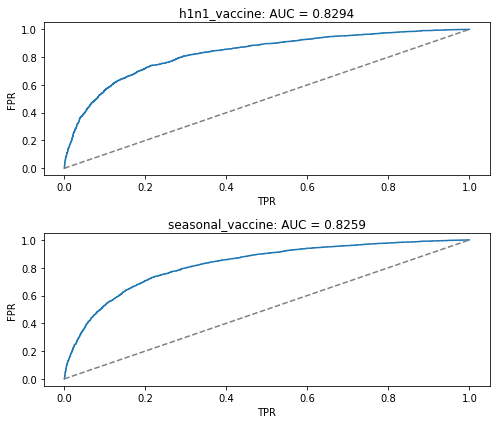

In [65]:
fig, ax = plt.subplots(2, 1, figsize = (7, 6))

plot_roc(
    y_test_['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)

plot_roc(
    y_test_['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]

)

fig.tight_layout()

In [66]:
roc_auc_score(y_test_, y_preds) #Our model does fairly well with a score of 82%

0.8276405790454424

now we train on full dataset

In [67]:
%%time
#on full data_set
model_1.fit(X_train, y_train);
None

Wall time: 378 ms


predict probability on the full data set

In [68]:
test_prob = model_1.predict_proba(X_test)
test_prob

[array([[0.87280478, 0.12719522],
        [0.94475228, 0.05524772],
        [0.62906841, 0.37093159],
        ...,
        [0.80410787, 0.19589213],
        [0.94924508, 0.05075492],
        [0.38418105, 0.61581895]]),
 array([[0.5736    , 0.4264    ],
        [0.92877344, 0.07122656],
        [0.3626208 , 0.6373792 ],
        ...,
        [0.598725  , 0.401275  ],
        [0.68002776, 0.31997224],
        [0.3578779 , 0.6421221 ]])]

In [69]:
submission_df = pd.read_csv('F:\\bizz\\DATA SETS\\Flu Shot Learning\\submission_format.csv', index_col = 'respondent_id')
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [70]:
np.testing.assert_array_equal(X_test.index.values,
                             submission_df.index.values)

In [71]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_prob[0][:, 1]
submission_df["seasonal_vaccine"] = test_prob[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127195,0.426400
26708,0.055248,0.071227
26709,0.370932,0.637379
26710,0.464355,0.803452
26711,0.286664,0.634914


In [86]:
submission_df.to_csv('flu-shot submission.csv', 
                       index=True, header=True)

After submission I obtained a score of 81%